In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

indra = df[df['empresa'] == 'Indra']

indra.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

indra = indra [['date','open','high','low','close','adj close']]

indra.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

indra['date'] = pd.to_datetime(indra['date'], format="%Y-%m-%d")

indra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 25850 to 27174
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

indra.sort_values(by='date',ascending= True, inplace=True)

indra.head()

,date,open,high,low,close,adj close
25852,2019-01-02,8.150,8.210,8.000,8.125,7.692775
26737,2019-01-03,8.100,8.135,7.920,8.000,7.574425
26735,2019-01-04,8.050,8.240,8.040,8.205,7.768519
26734,2019-01-07,8.225,8.225,7.890,8.050,7.621765
26733,2019-01-08,8.095,8.265,8.055,8.185,7.749583


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acciona = indra[(indra['date'] >= fecha_inicio) & (indra['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

indra.shape

(1325, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=indra['date'].min(), end=indra['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

indra = indra.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

indra = indra.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

indra.head(10)

,date,open,high,low,close,adj close
0,2019-01-02,8.150,8.210,8.000,8.125,7.692775
1,2019-01-03,8.100,8.135,7.920,8.000,7.574425
2,2019-01-04,8.050,8.240,8.040,8.205,7.768519
3,2019-01-05,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,NaN,NaN,NaN,NaN,NaN
5,2019-01-07,8.225,8.225,7.890,8.050,7.621765
6,2019-01-08,8.095,8.265,8.055,8.185,7.749583
7,2019-01-09,8.250,8.700,8.250,8.580,8.123569
8,2019-01-10,8.540,8.590,8.480,8.535,8.080964
9,2019-01-11,8.575,8.585,8.425,8.480,8.028890


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

indra = indra.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


indra.head(10)

,date,open,high,low,close,adj close
0,2019-01-02,8.150,8.210,8.000,8.125,7.692775
1,2019-01-03,8.100,8.135,7.920,8.000,7.574425
2,2019-01-04,8.050,8.240,8.040,8.205,7.768519
3,2019-01-05,8.050,8.240,8.040,8.205,7.768519
4,2019-01-06,8.050,8.240,8.040,8.205,7.768519
5,2019-01-07,8.225,8.225,7.890,8.050,7.621765
6,2019-01-08,8.095,8.265,8.055,8.185,7.749583
7,2019-01-09,8.250,8.700,8.250,8.580,8.123569
8,2019-01-10,8.540,8.590,8.480,8.535,8.080964
9,2019-01-11,8.575,8.585,8.425,8.480,8.028890


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

indra = indra.set_index('date')

indra.head(10)

,open,high,low,close,adj close
date,,,,,
2019-01-02,8.150,8.210,8.000,8.125,7.692775
2019-01-03,8.100,8.135,7.920,8.000,7.574425
2019-01-04,8.050,8.240,8.040,8.205,7.768519
2019-01-05,8.050,8.240,8.040,8.205,7.768519
2019-01-06,8.050,8.240,8.040,8.205,7.768519
2019-01-07,8.225,8.225,7.890,8.050,7.621765
2019-01-08,8.095,8.265,8.055,8.185,7.749583
2019-01-09,8.250,8.700,8.250,8.580,8.123569
2019-01-10,8.540,8.590,8.480,8.535,8.080964


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

indra.index = pd.DatetimeIndex(indra.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

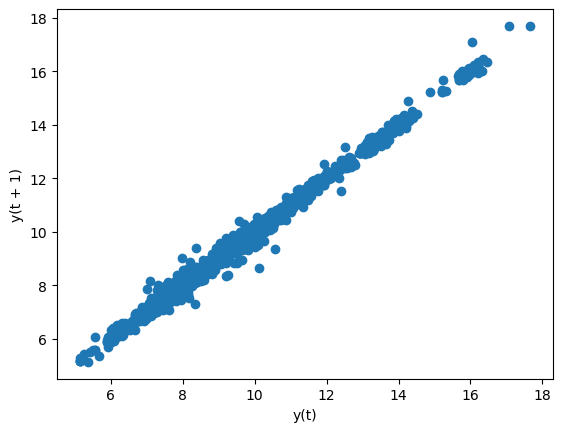

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(indra.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = indra.close[:-10], indra.close[-10:]

train.shape, test.shape

((1876,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(indra.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    15.830230
2024-02-22    15.830459
2024-02-23    15.830689
2024-02-24    15.830918
2024-02-25    15.831148
2024-02-26    15.831377
2024-02-27    15.831606
2024-02-28    15.831834
2024-02-29    15.832063
2024-03-01    15.832292
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    15.750000
2024-02-22    15.890000
2024-02-23    15.930000
2024-02-24    15.930000
2024-02-25    15.930000
2024-02-26    16.070000
2024-02-27    16.030001
2024-02-28    17.080000
2024-02-29    17.670000
2024-03-01    17.690001
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.5817846097783536

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,15.750000,15.830230,0.080230
2024-02-22,15.890000,15.830459,-0.059541
2024-02-23,15.930000,15.830689,-0.099311
2024-02-24,15.930000,15.830918,-0.099082
2024-02-25,15.930000,15.831148,-0.098852
2024-02-26,16.070000,15.831377,-0.238623
2024-02-27,16.030001,15.831606,-0.198395
2024-02-28,17.080000,15.831834,-1.248166
2024-02-29,17.670000,15.832063,-1.837937
2024-03-01,17.690001,15.832292,-1.857709
